# Explore here

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [2]:
# Guarda el DataFrame en un archivo CSV en la carpeta './data/raw'
df.to_csv('/workspaces/machine-learning-python-template/data/raw/data_raw.csv', index=False)

In [3]:
# Obtener las dimensiones
df.shape

(48895, 16)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos. hay datos nulos, los cuales son datos irrelevantes al analisis estadistico vamos a prodecer a eliminar estas columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Verificar duplicados en todo el DataFrame. No hay duplicados
duplicates = df.duplicated()

# Contar el número de duplicados
num_duplicates = df.duplicated().sum()
print(num_duplicates)


0


In [6]:
# eliminando columnas con datos innecesarios y con datos nulos 
df.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
df.to_csv('/workspaces/machine-learning-python-template/data/interim/data_raw_sin_NaN.csv', index=False)
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


['neighbourhood_group', 'neighbourhood', 'room_type']


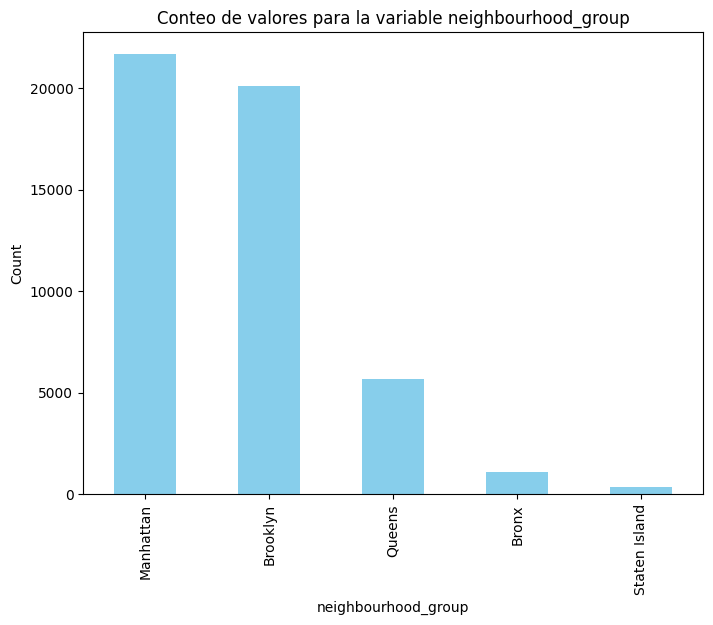

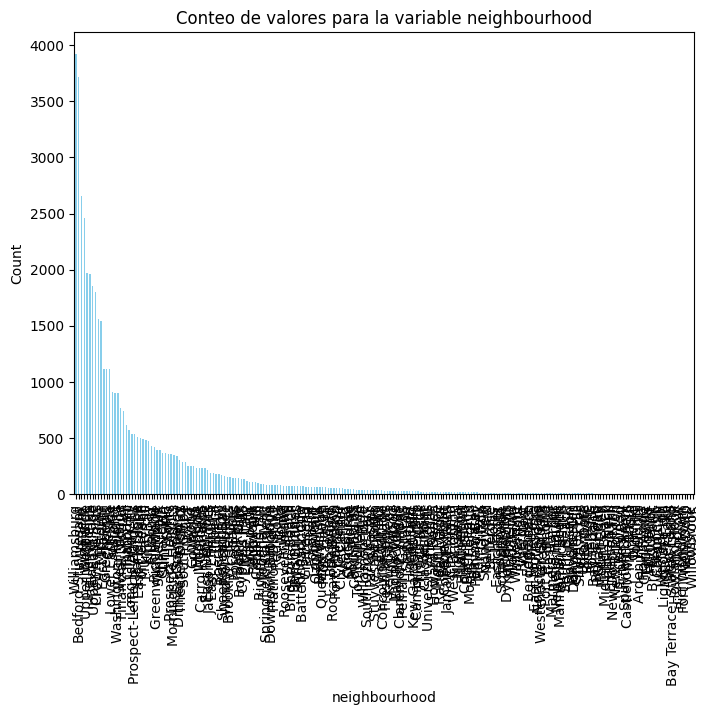

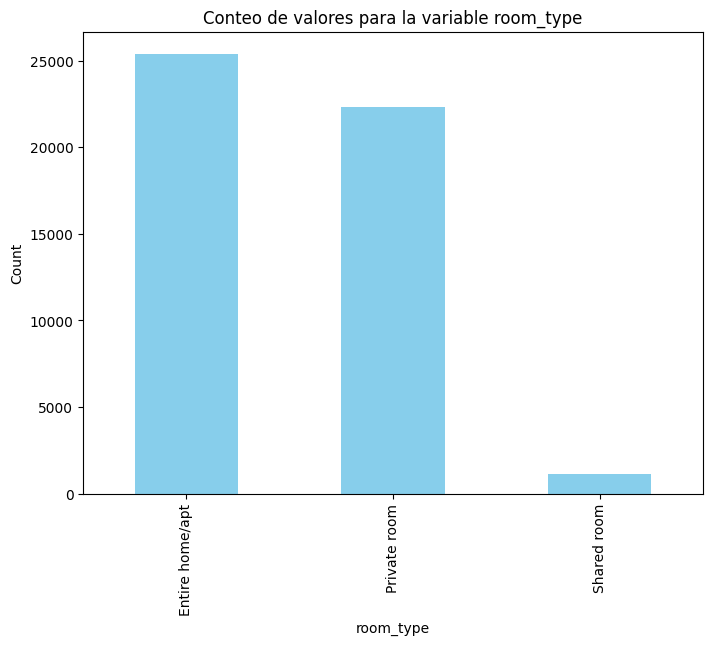

In [7]:
# Identificacion de las variables categoricas

# Obtener las variables categóricas en el DataFrame
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar las variables categóricas
print(variables_categoricas)

import matplotlib.pyplot as plt

# Obtener las variables categóricas en el DataFrame
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar un conteo de las variables categóricas
for columna in variables_categoricas:
    plt.figure(figsize=(8, 6))
    df[columna].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Conteo de valores para la variable ' + columna)
    plt.xlabel(columna)
    plt.ylabel('Count')
    plt.show()



['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
           latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582             

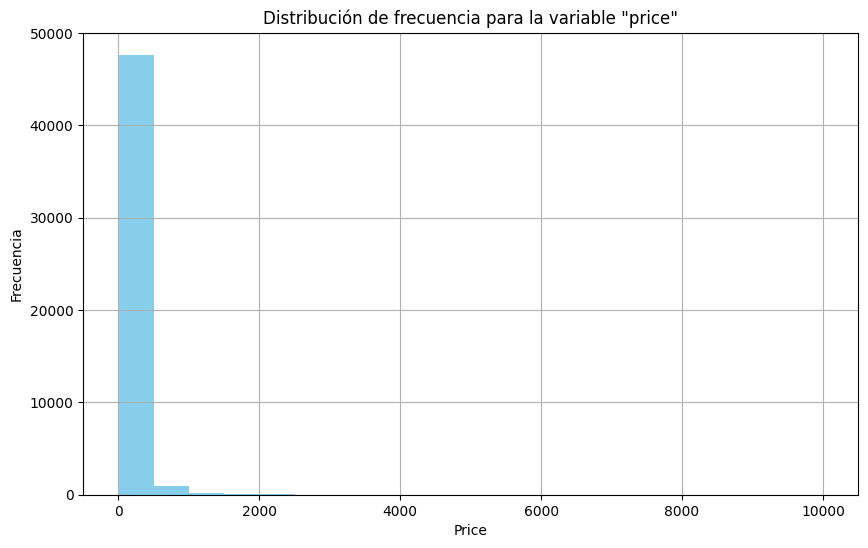

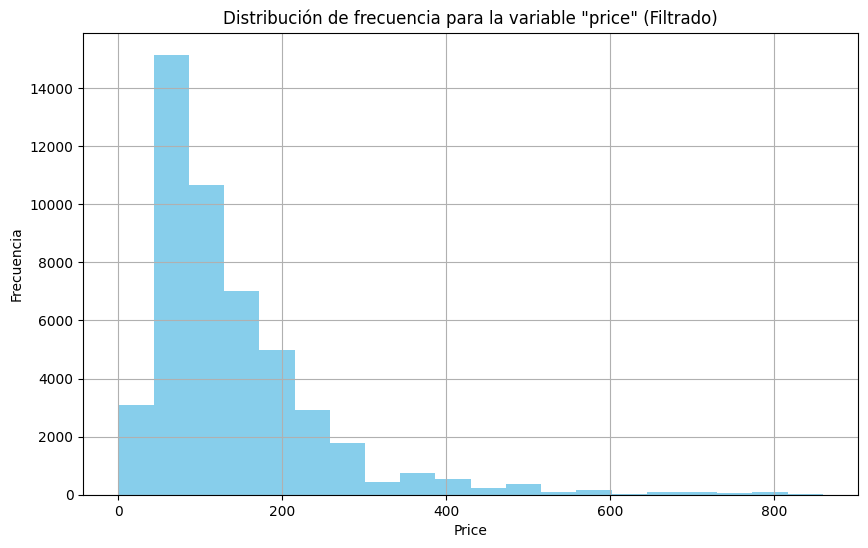

In [18]:
# Obtener las variables numéricas en el DataFrame
variables_numericas = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Mostrar las variables numéricas
print(variables_numericas)

# Obtener estadísticas descriptivas de las variables numéricas
estadisticas_numericas = df.describe()

# Mostrar las estadísticas descriptivas
print(estadisticas_numericas)

# Variables seleccionadas para el análisis visual['price', 'minimum_nights', 'availability_365']

# Mostrar la distribución de frecuencia para la variable 'price'
plt.figure(figsize=(10, 6))
df['price'].hist(color='skyblue', bins=20)
plt.title('Distribución de frecuencia para la variable "price"')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la media y la desviación estándar de la variable 'price'
media_price = df['price'].mean()
desviacion_estandar_price = df['price'].std()

# Definir el umbral para filtrar valores basados en la desviación estándar
umbral_superior = media_price + 3 * desviacion_estandar_price

# Filtrar valores por debajo del umbral superior
df_filtrado = df[df['price'] <= umbral_superior]

import matplotlib.pyplot as plt

# Mostrar el histograma de frecuencia para la variable 'price' en el DataFrame filtrado
plt.figure(figsize=(10, 6))
df_filtrado['price'].hist(color='skyblue', bins=20)
plt.title('Distribución de frecuencia para la variable "price" (Filtrado)')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()




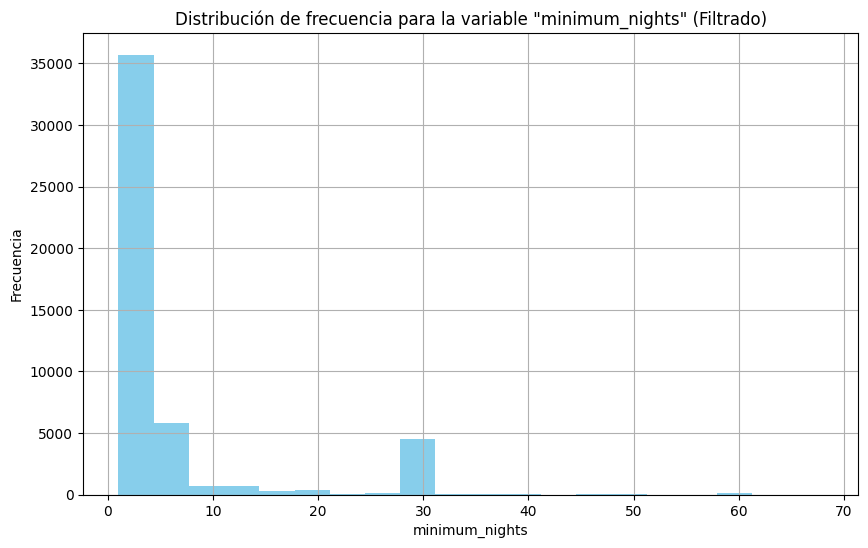

In [24]:
# Calcular la media y la desviación estándar de la variable 'price'
media_mn = df['minimum_nights'].mean()
desviacion_estandar_mn = df['minimum_nights'].std()

# Definir el umbral para filtrar valores basados en la desviación estándar
umbral_superior_mn = media_mn + 3 * desviacion_estandar_mn

# Filtrar valores por debajo del umbral superior
df_filtrado_mn = df[df['minimum_nights'] <= umbral_superior_mn]

import matplotlib.pyplot as plt

# Mostrar el histograma de frecuencia para la variable 'price' en el DataFrame filtrado
plt.figure(figsize=(10, 6))
df_filtrado_mn['minimum_nights'].hist(color='skyblue', bins=20)
plt.title('Distribución de frecuencia para la variable "minimum_nights" (Filtrado)')
plt.xlabel('minimum_nights')
plt.ylabel('Frecuencia')
plt.show()



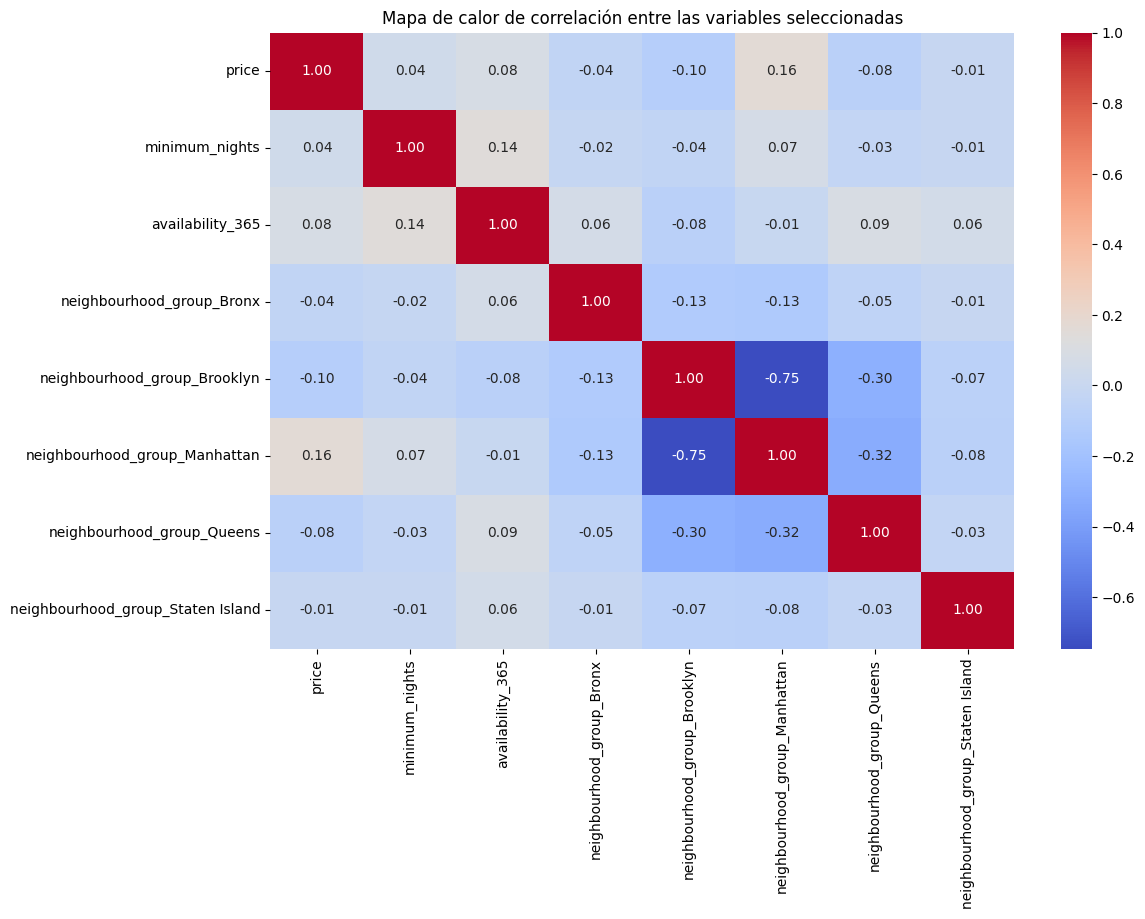

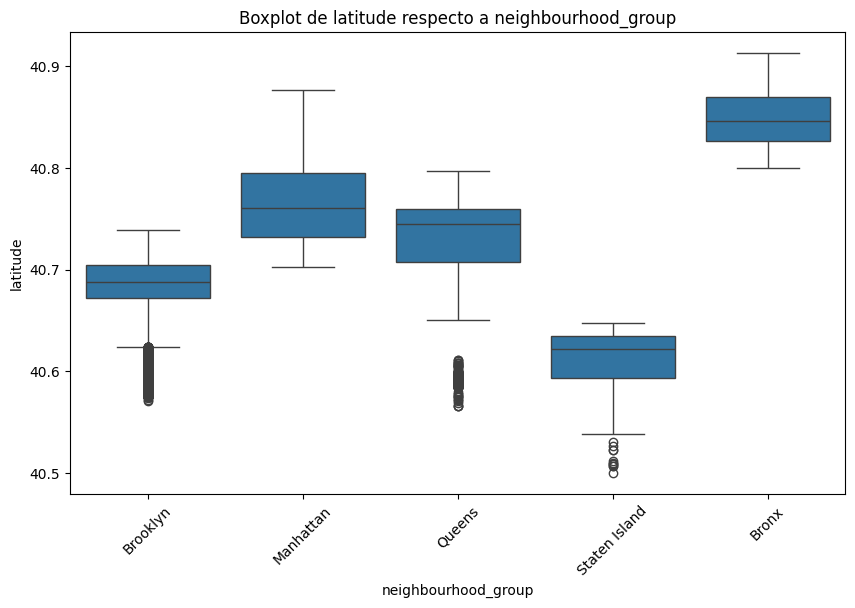

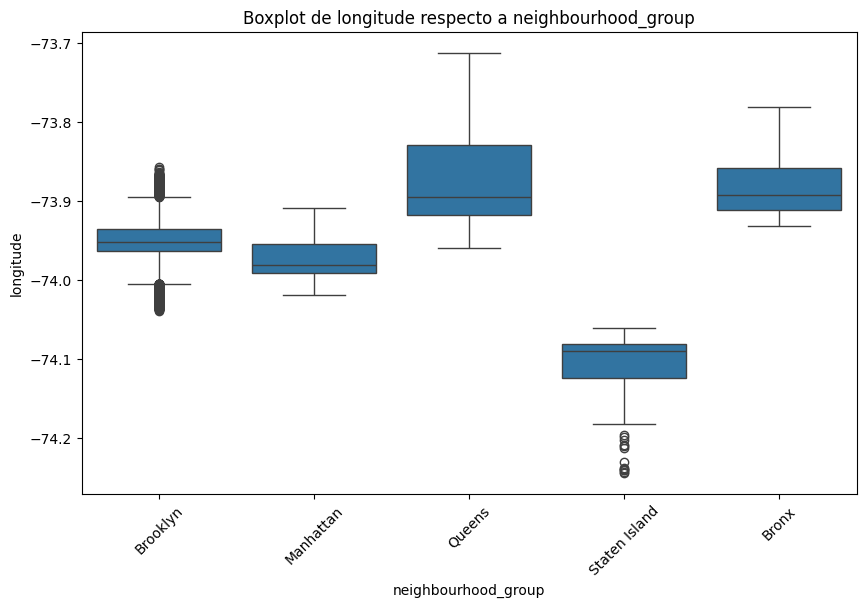

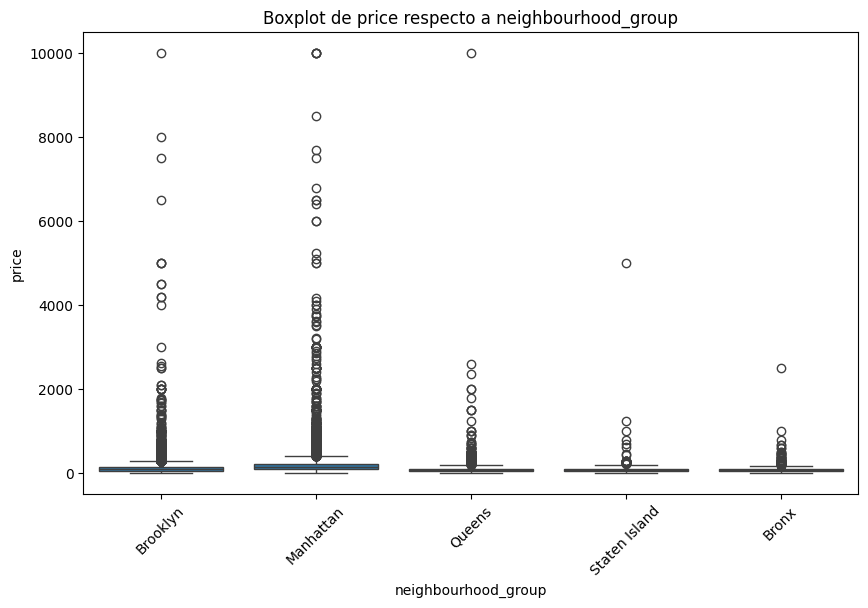

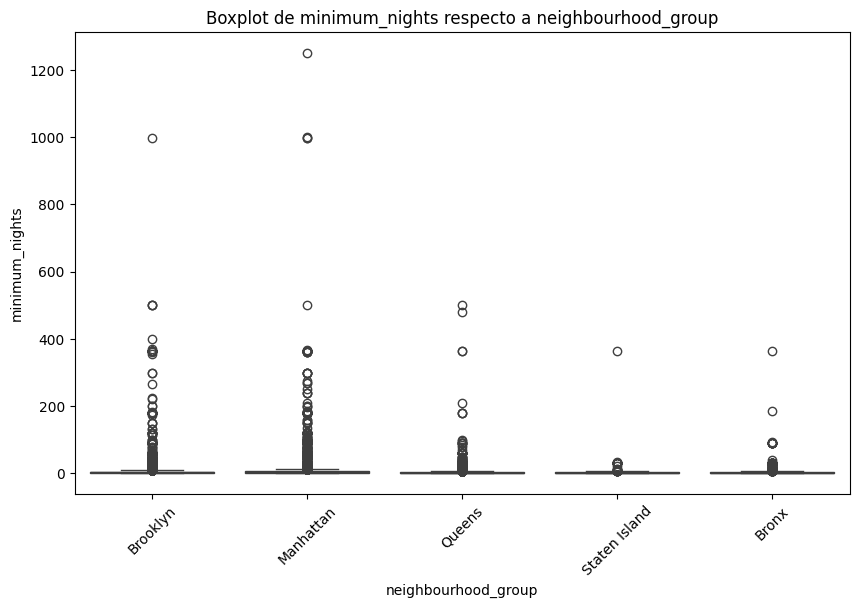

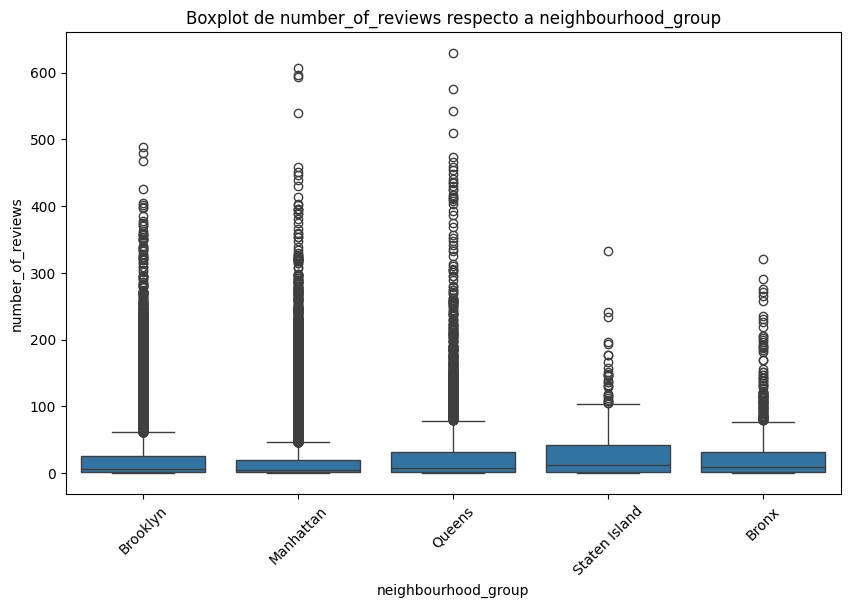

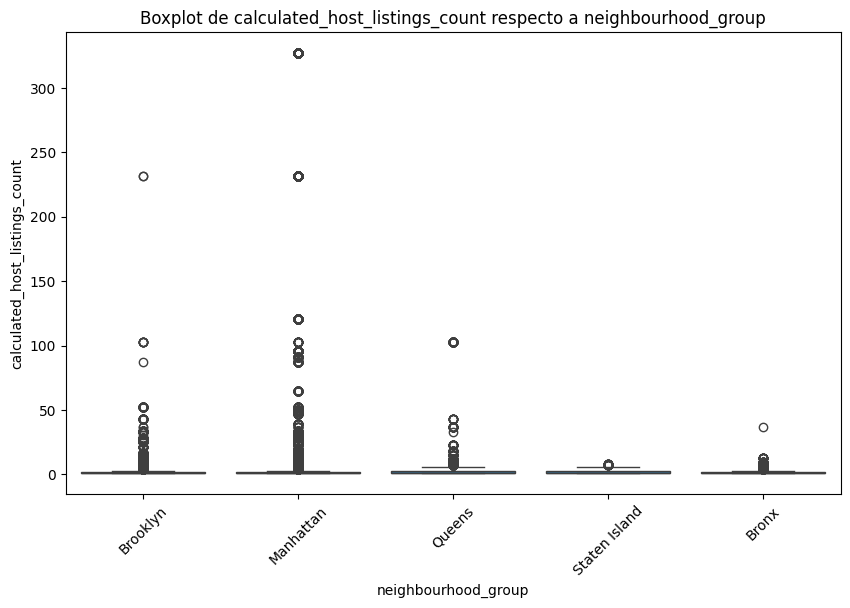

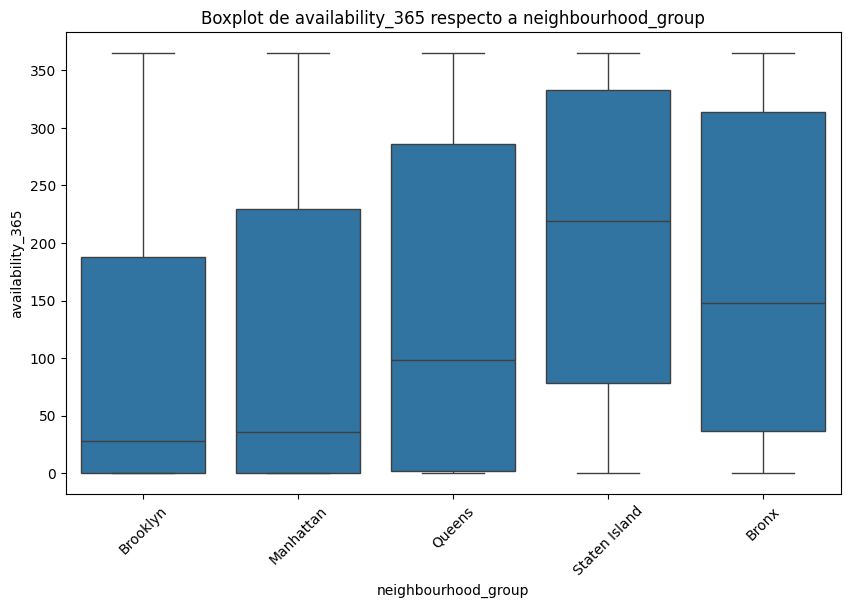

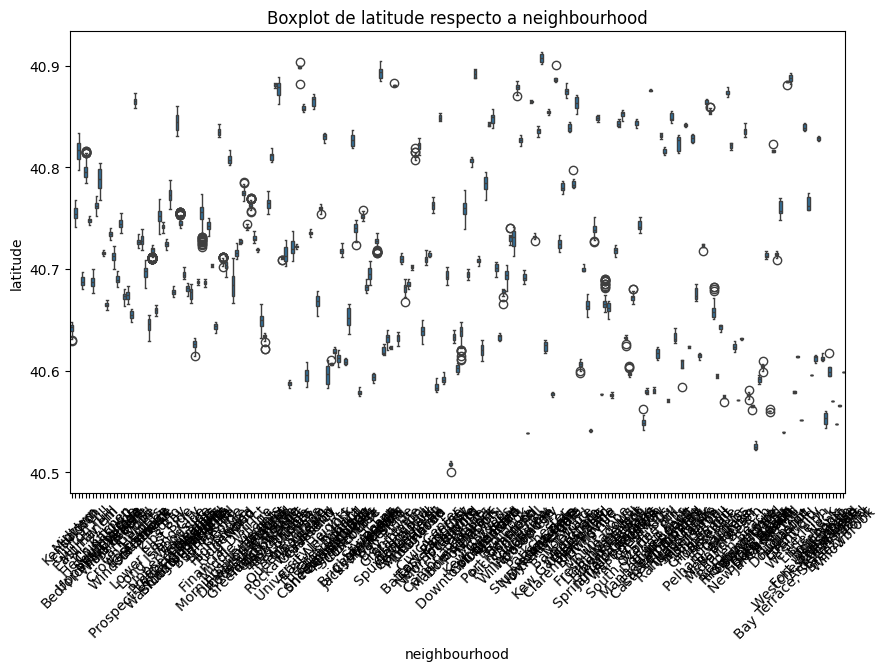

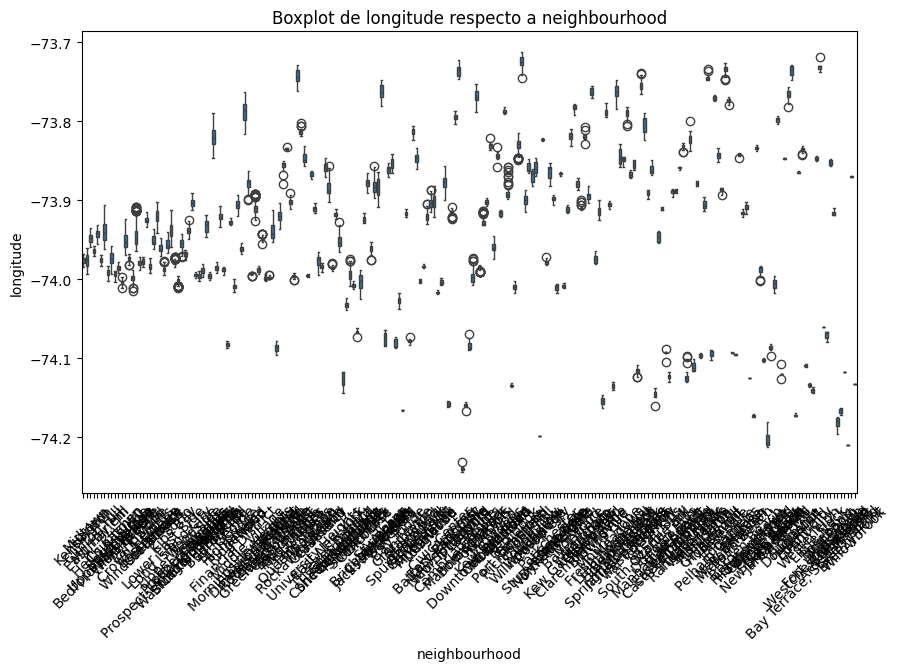

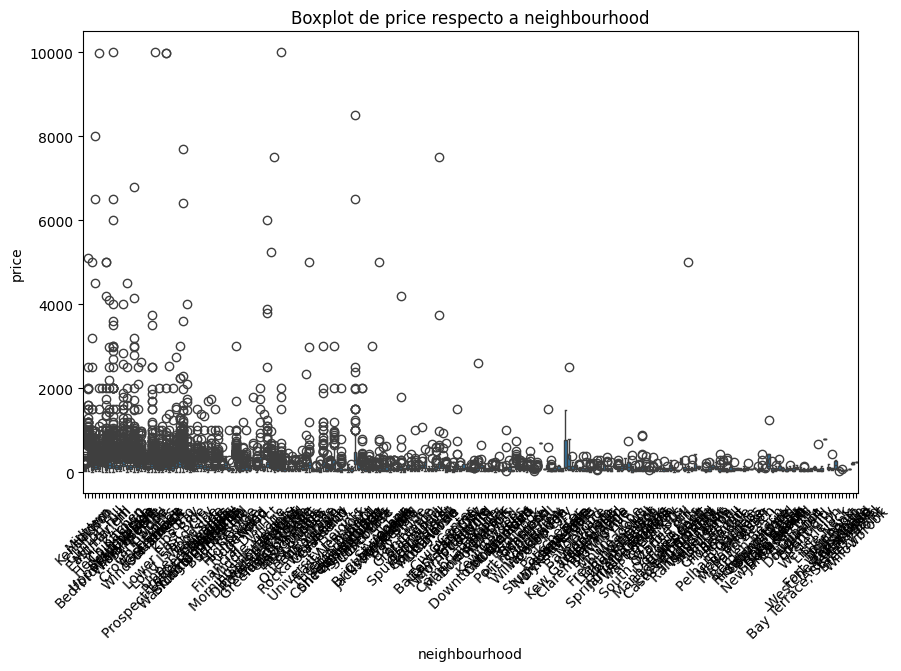

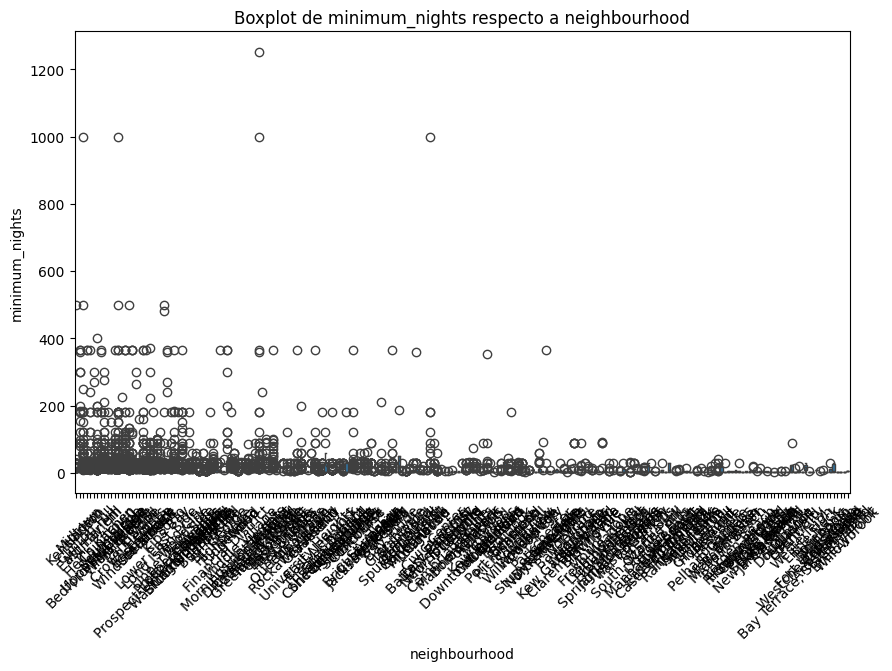

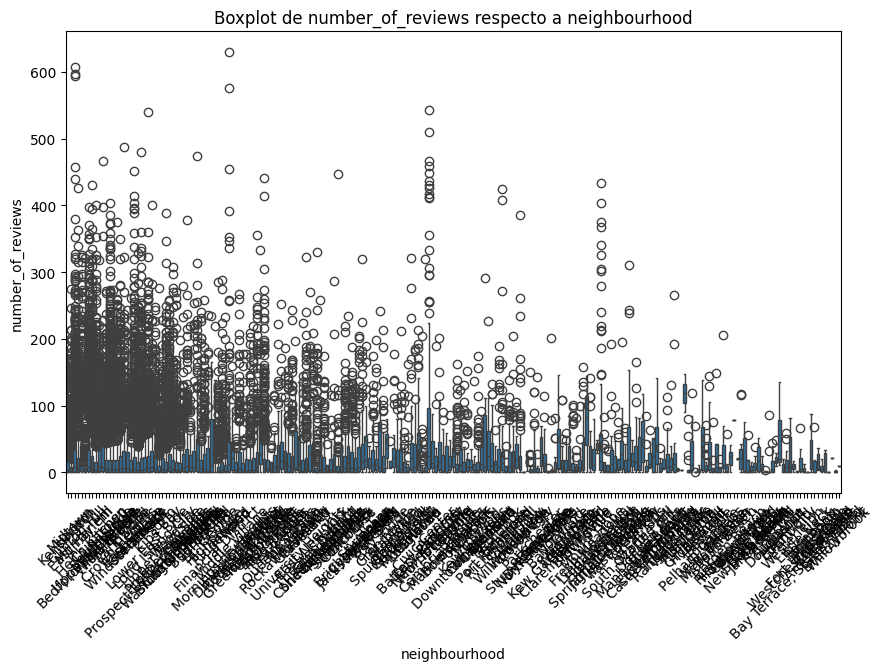

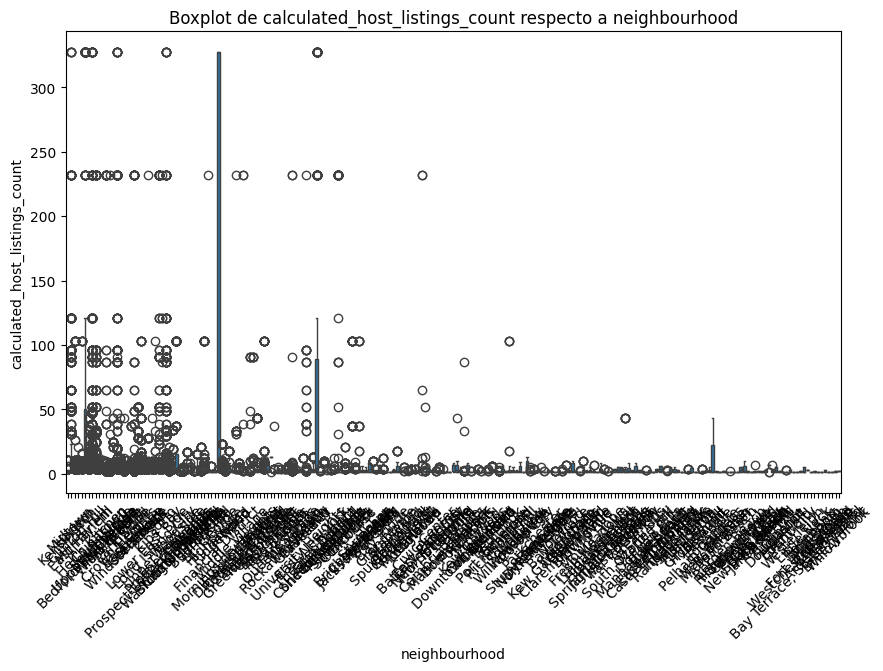

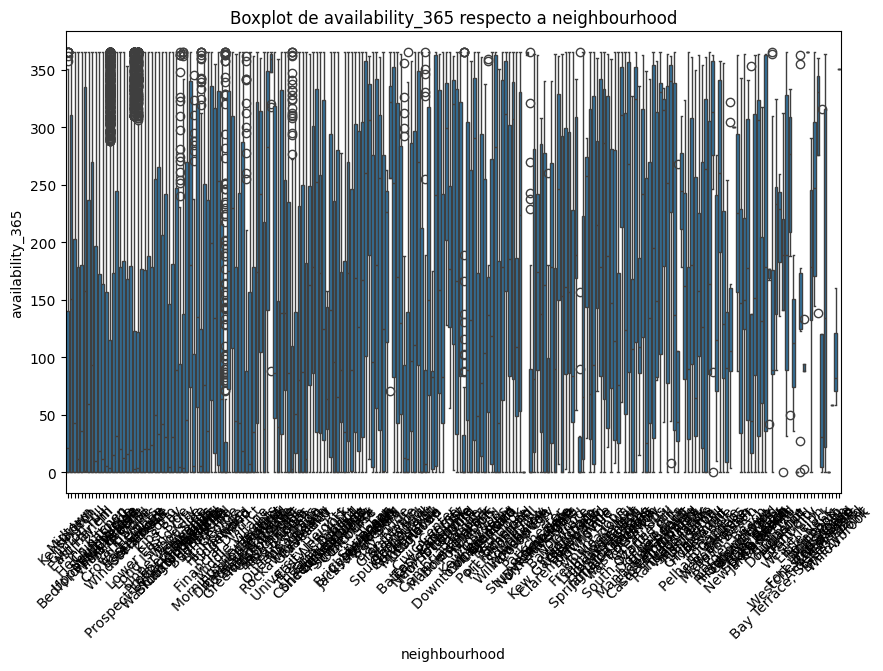

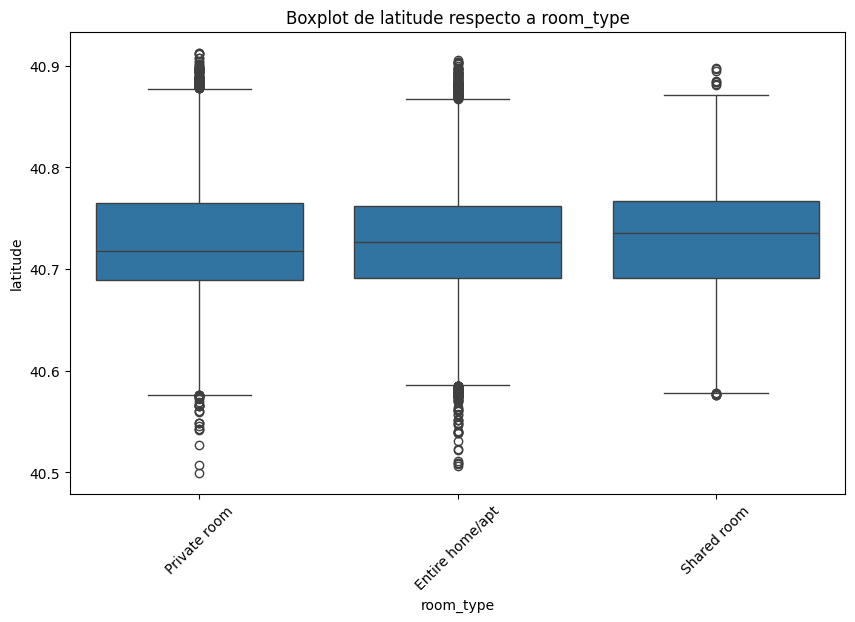

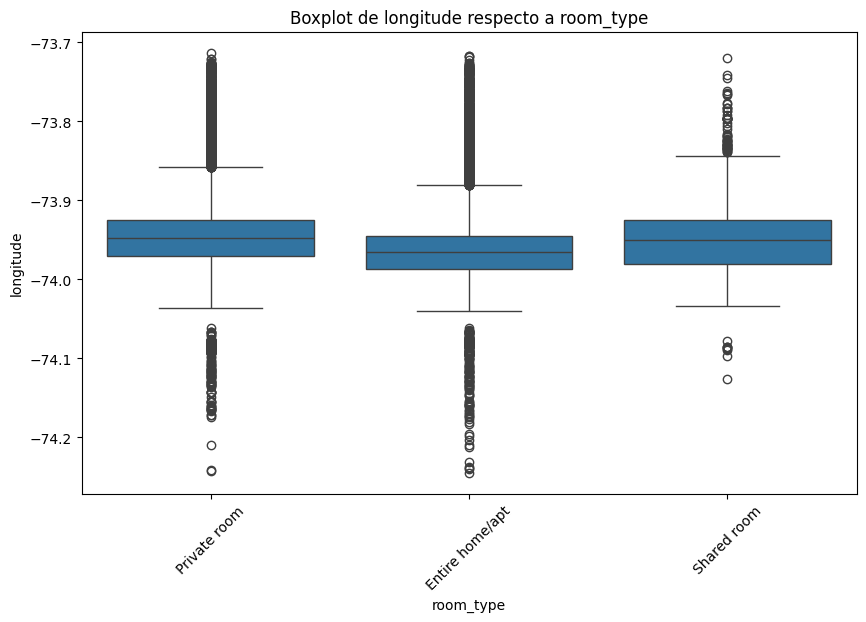

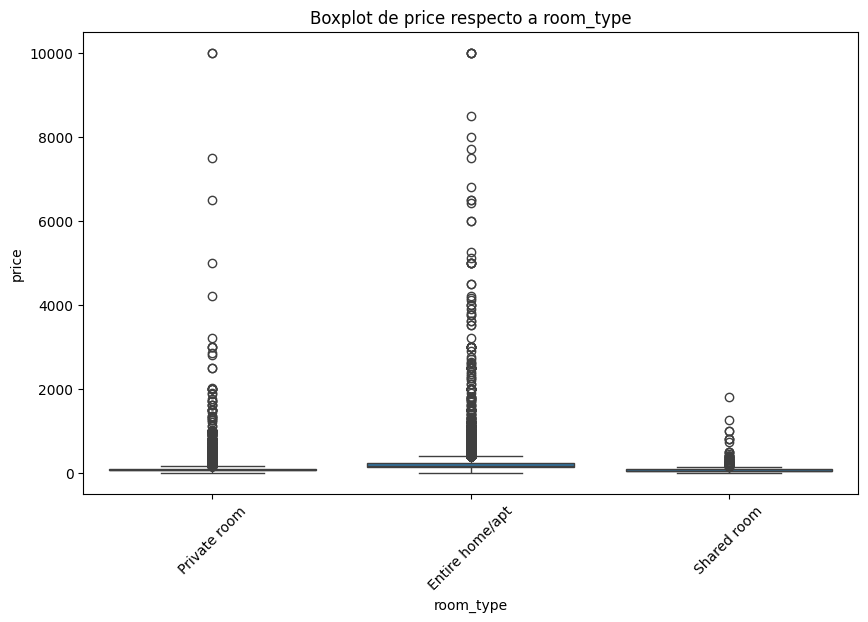

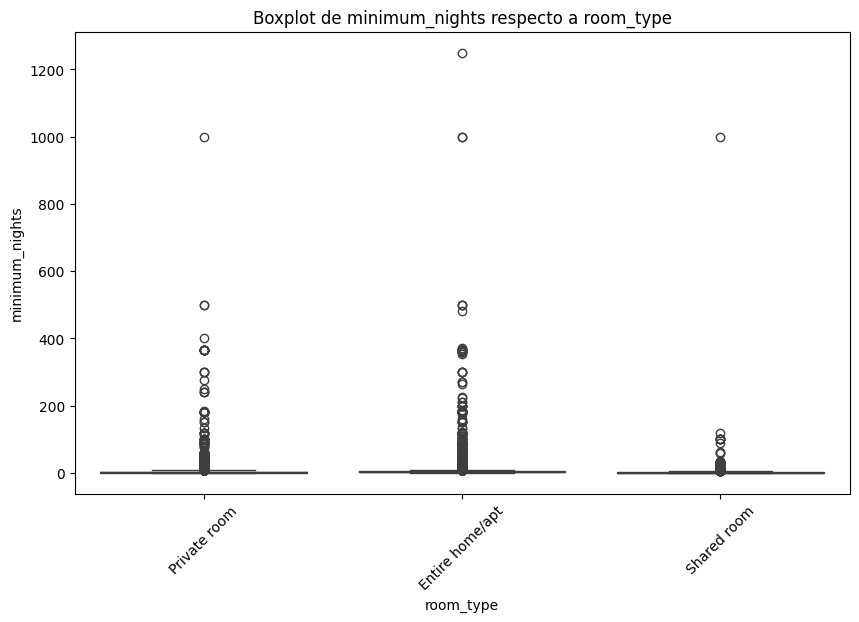

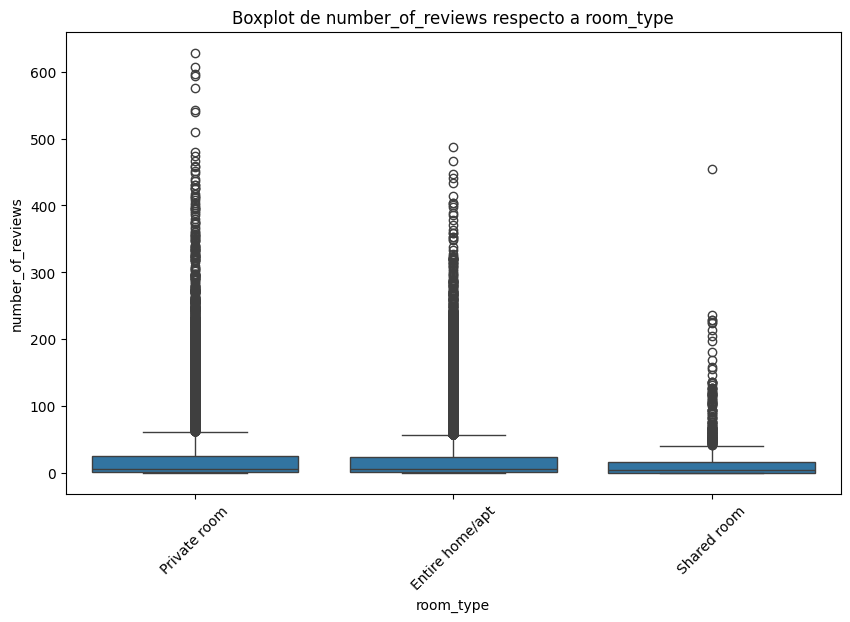

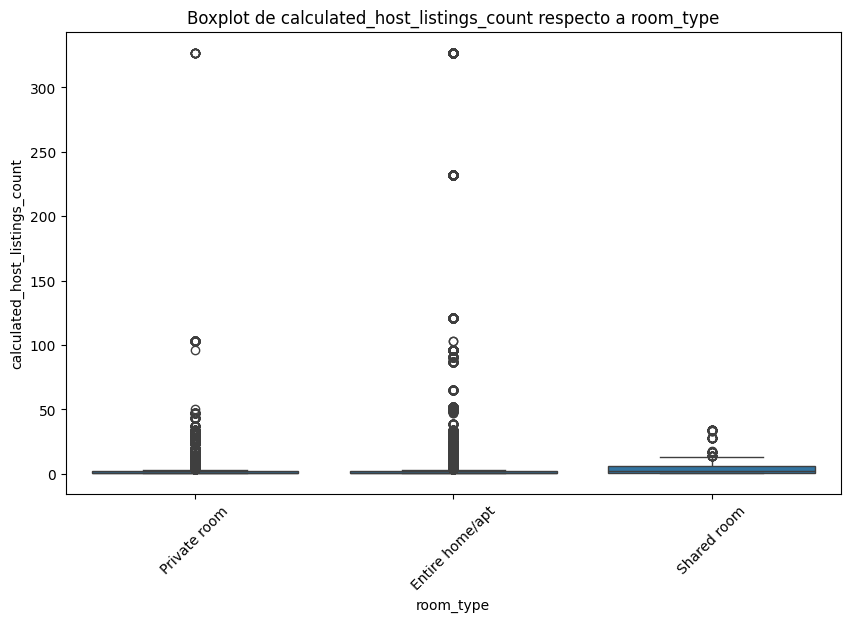

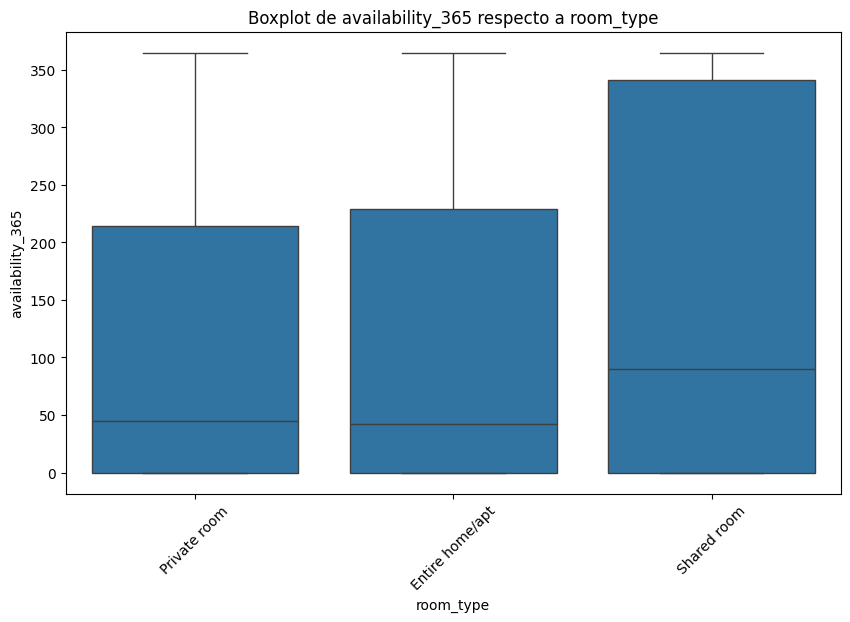

In [35]:
# Analisis Miltivariable

import seaborn as sns

# Seleccionar las variables específicas para el análisis multivariable
variables_seleccionadas = df[['neighbourhood_group', 'price', 'minimum_nights', 'availability_365']]

# Transformar las variables categóricas en variables dummy
variables_dummies = pd.get_dummies(variables_seleccionadas[['neighbourhood_group']])

# Combinar las variables numéricas y las variables dummy
variables_final = pd.concat([variables_seleccionadas[['price', 'minimum_nights', 'availability_365']], variables_dummies], axis=1)

# Calcular la matriz de correlación
matriz_correlacion = variables_final.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre las variables seleccionadas')
plt.show()


# Crear un gráfico de boxplot para cada variable categórica respecto a las variables numéricas
for columna_cat in variables_categoricas:
    for columna_num in variables_numericas:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=columna_cat, y=columna_num, data=df)
        plt.title('Boxplot de ' + columna_num + ' respecto a ' + columna_cat)
        plt.xlabel(columna_cat)
        plt.ylabel(columna_num)
        plt.xticks(rotation=45)
        plt.show()


In [26]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
